### Importing the modules required for the data manipulation, ploting and applying mathematical & statistical analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform

In [2]:
df = pd.read_csv('bike_buyers_clean.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [3]:
df.shape

(1000, 13)

In [4]:
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [5]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [6]:
columns = ['ID', 'Marital_Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home_Owner', 'Cars', 'Commute_Distance', 'Region', 'Age',
       'Purchased_Bike']
df.columns = columns

In [7]:
categorical_features = ['Marital_Status', 'Gender', 'Education',
       'Occupation', 'Home_Owner', 'Commute_Distance', 'Region','Purchased_Bike']

for i in categorical_features:
    print(i)
    print(df[i].unique())

Marital_Status
['Married' 'Single']
Gender
['Female' 'Male']
Education
['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation
['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home_Owner
['Yes' 'No']
Commute_Distance
['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']
Region
['Europe' 'Pacific' 'North America']
Purchased_Bike
['No' 'Yes']


In [8]:
commute_map = {'0-1 Miles':0.5, '2-5 Miles':2.5, '5-10 Miles':7.5, '1-2 Miles':2.5, '10+ Miles':10.0}
df['Commute_Distance'] = [commute_map[miles] for miles in df['Commute_Distance']]

df['Purchased_Bike'] = df['Purchased_Bike'].replace({'Yes': 1, 'No': 0})
df

,ID,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0.5,Europe,42,0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0.5,Europe,43,0
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2.5,Europe,60,0
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,7.5,Pacific,41,1
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0.5,Europe,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2.5,North America,54,1
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2.5,North America,35,1
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0.5,North America,38,1
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,2.5,North America,38,0


In [9]:
numerical_features = ['Income', 'Children', 'Cars', 'Commute_Distance', 'Age']
target_variable = ['Purchased_Bike']

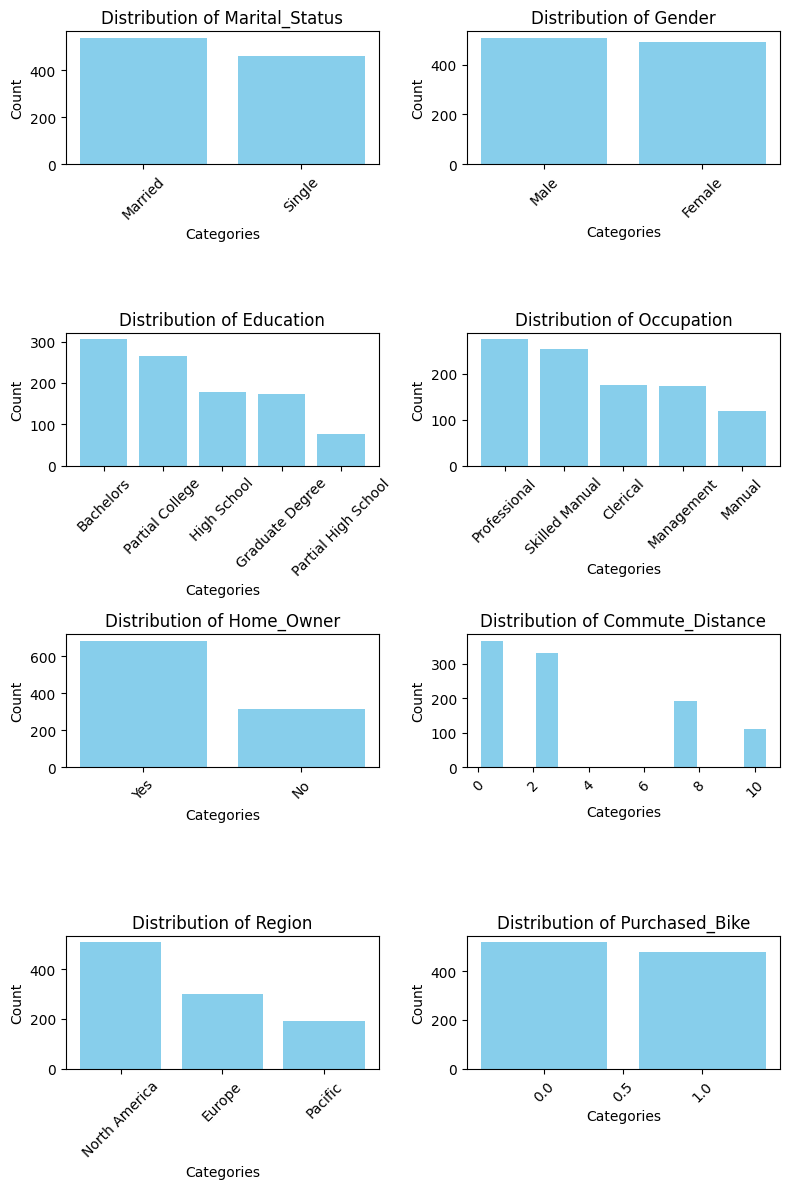

In [10]:
fig, axes = plt.subplots(4, 2, figsize=(8, 12))
axes = axes.flatten()  # Flatten the 2D array of subplots for easier indexing

# Loop through each categorical feature and plot
for i, feature in enumerate(categorical_features):
    # Calculate value counts
    category_counts = df[feature].value_counts()
    
    # Plot the bar plot
    axes[i].bar(category_counts.index, category_counts.values, color='skyblue')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

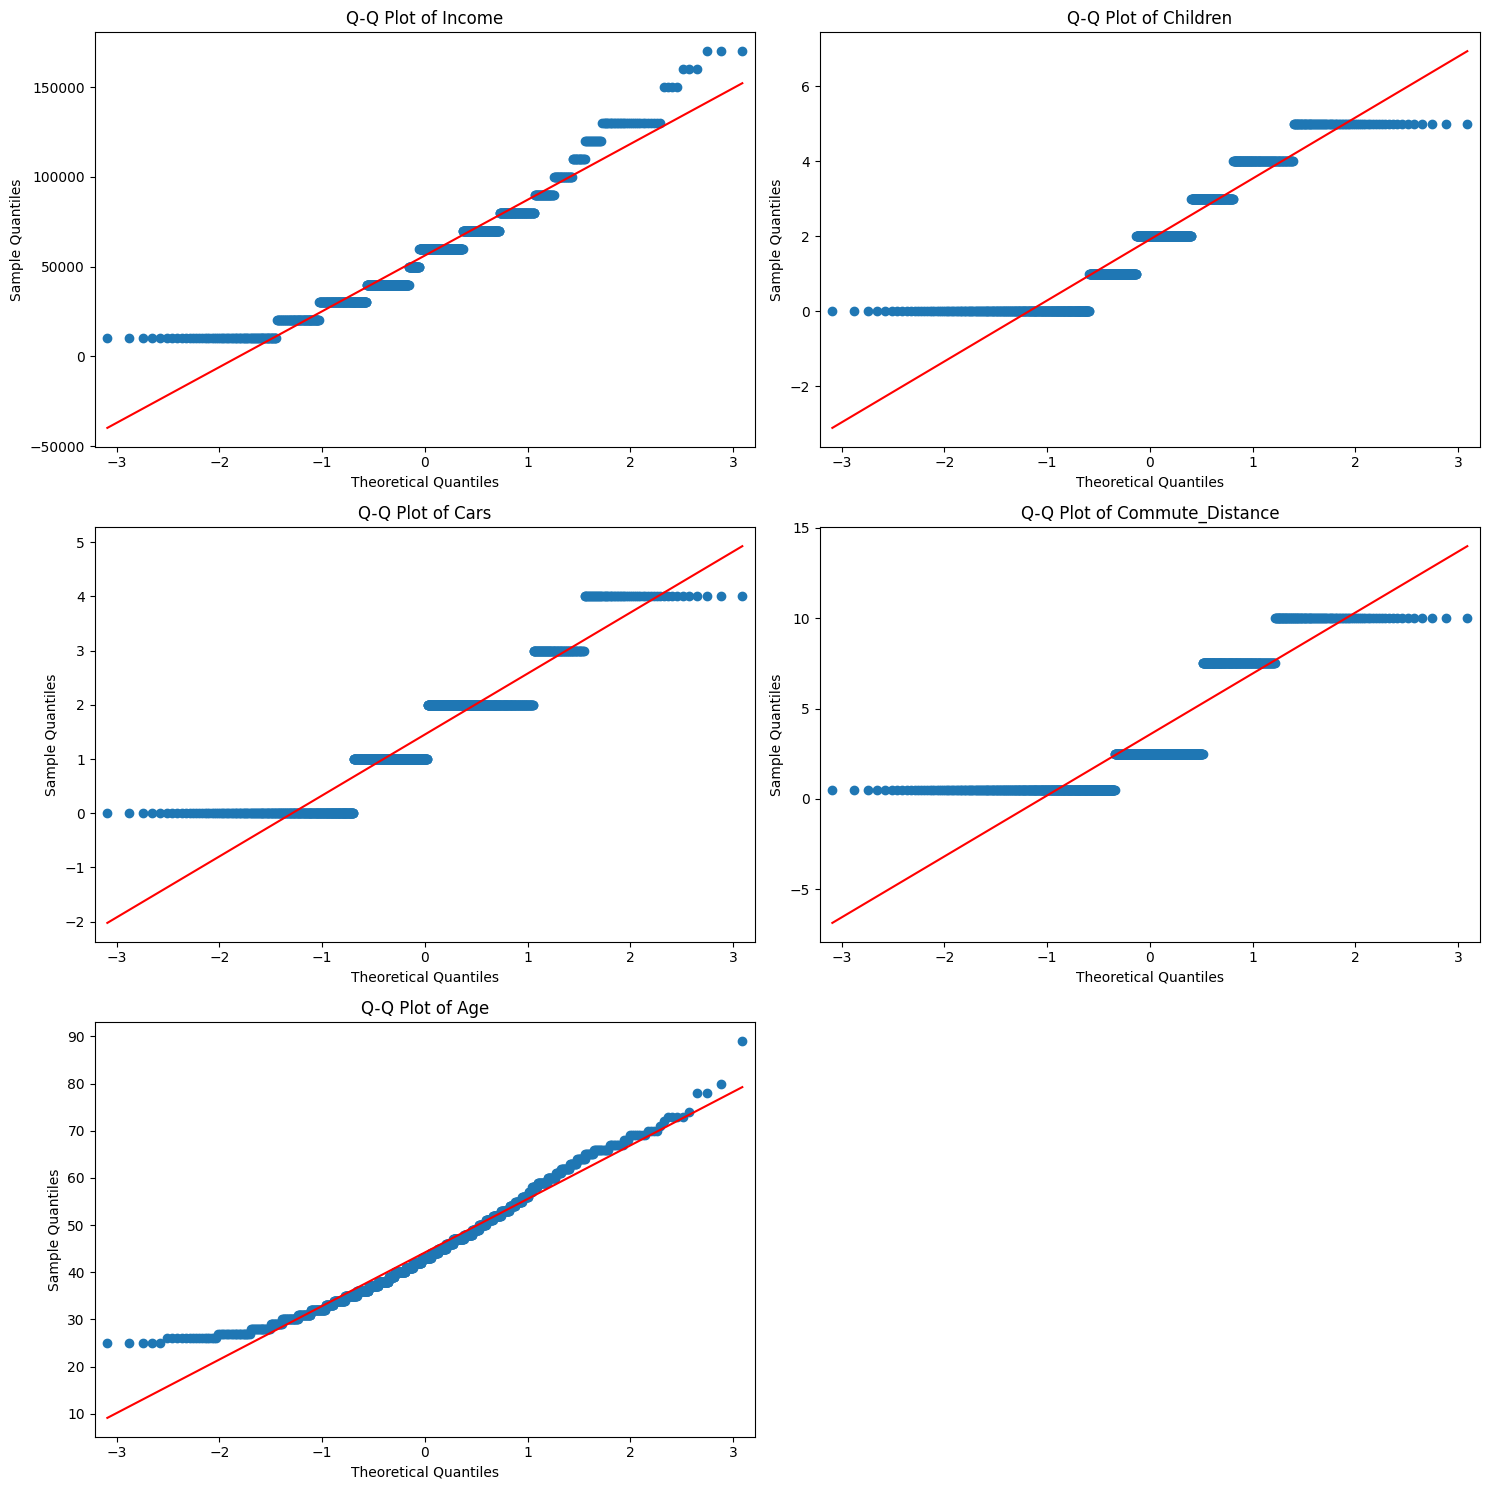

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through numerical features and create Q-Q plots
for i, feature in enumerate(numerical_features):
    qqplot(df[feature], line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot of {feature}')

# Hide any extra subplots if num_features is odd
if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()